<a href="https://colab.research.google.com/github/Kent7474/Proyecto_Seminario/blob/main/An%C3%A1lisis_de_activos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DE LIBRERÍAS

In [455]:
# Frameworks principales
import pandas as pd
import numpy as np

# from pandas_datareader import data as pdr #No está funcionando
import yfinance as yf

# Frameworks secundarios
from datetime import datetime
    # Visualización
import matplotlib.pyplot as plt
import statistics
import seaborn as sns


# DEFINICIÓN DE ACTIVOS Y FECHAS

## Periodos - Fecha inicio y fin

In [456]:
 #  YYYY-mm-dd
fechaInicio = "2000-01-01"
#today = "2022-11-01"
today = datetime.today().strftime('%Y-%m-%d')

In [457]:
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "ENPH", "META", "PEP", "TSLA", "V", "CAR", "TTD", "AMGN", "AAL", "TMUS", "CPRX"]
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "V"]

''' NASDAQ, más rendimiento a mayor riesgo'''
activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC"]

#activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC", "HON","GFS", "FISV", "FAST", "EXC", "CSX", "CRWD", "COST", "MELI", "META", "MRVL", "MAR", "LULU", "HON", "GFS" ]
#activos = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'JNJ', 'PG', 'V', 'JPM', 'KO', 'PEP', 'XOM', 'CVX', 'T', 'VZ', 'INTC', 'CSCO', 'ADBE', 'CRM', 'ABT', 'AMGN', 'UNH', 'PFE', 'MRK', 'BMY', 'RTX', 'LMT', 'GS', 'MA']

''' Excel facu '''
#activos = ['FNKO', 'PEP', 'MCD', 'SONY', 'DIS', 'CMCSA', 'NTDOY', 'CCOEY', 'MDLZ', 'GME']

'''Excel práctica en clase '''
#activos = ['TSLA', 'META', 'AAPL', 'AMZN', 'NFLX']

len(activos)

8

# DESCARGA Y VISUALIZACIÓN DE RENDIMIENTOS. 
(Columna 'Adj Close') desde Yahoo Finance.

In [458]:
''' Con la función yf.download descargamos los rendimientos de cada activo
    según las fechas dadas (fechaInicio y today). De todas las columnas que
    nos trae, nos quedamos con 'Adj Close' '''
#dataSet = yf.download(activos, start=fechaInicio, end=today)['Adj Close']
dataSet = yf.download(activos, start=fechaInicio, end=today, interval='1mo')['Adj Close']

''' Revisamos los primero y los últimos 3 registros del DataFrame, 
     para asegurarnos que tenga datos.'''
display(dataSet)
pd.DataFrame(dataSet).to_excel("DataSet.xlsx")
#display(dataSet.head(3))
#display(dataSet.tail(3))

[*********************100%***********************]  8 of 8 completed


,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Date,,,,,,,,
2000-01-01,13.668243,18.000000,42.062500,28.674053,NaN,0.046875,NaN,0.708508
2000-02-01,25.319611,19.750000,46.958332,32.749638,NaN,0.043620,NaN,1.223462
2000-03-01,27.631262,29.500000,32.750000,38.249573,NaN,0.046875,NaN,1.615053
2000-04-01,30.027843,43.750000,21.333332,36.763798,NaN,0.046549,NaN,1.703767
2000-05-01,27.948397,40.875000,21.270832,36.147739,NaN,0.044922,NaN,2.181681
...,...,...,...,...,...,...,...,...
2023-01-01,370.339996,75.150002,290.899994,27.805933,11.69,52.040001,353.859985,195.336823
2023-02-01,323.950012,78.580002,269.859985,24.529438,9.13,50.880001,322.130005,232.120575
2023-03-01,385.369995,98.010002,278.029999,32.536758,8.04,54.009998,345.480011,277.722809


In [459]:
dataSet.max()

ADBE    669.849976
AMD     158.369995
BIIB    422.239990
INTC     59.395283
LCID     52.980000
MNST     57.610001
NFLX    690.309998
NVDA    389.459991
dtype: float64

### Gráfico de precios de períodos

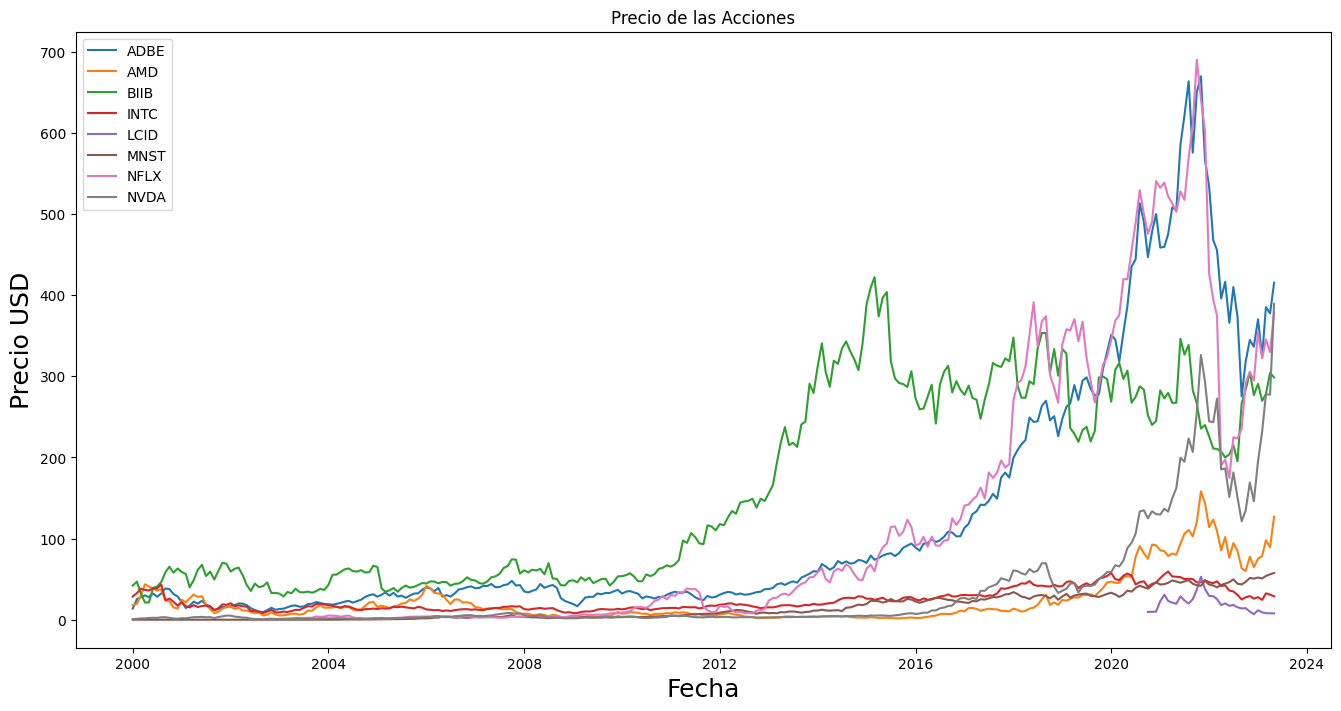

In [460]:
plt.figure(figsize=(16.2, 8))
for i in dataSet.columns.values:
    plt.plot(dataSet[i], label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio USD', fontsize=18)
plt.legend(dataSet.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=200, bbox_inches='tight')
plt.show()


### Calculamos el rendimiento de cada acción con el periodo anterior

In [461]:
''' Divide el valor de cada columna (df) por la columna anterior (df.shift(1))
    Luego le resta -1 para obtener el rendimiento.'''
rendimiento = (dataSet / dataSet.shift(1) -1).dropna()
rendimiento * 100

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Date,,,,,,,,
2020-11-01,7.016326,23.070796,-4.720914,9.191527,2.596054,10.722214,3.144579,6.921168
2020-12-01,4.524838,-1.025259,1.952784,3.789800,1.315791,9.082336,10.195632,-2.585524
2021-01-01,-8.268017,-6.618689,15.416967,11.421118,128.571415,-6.109430,-1.542353,-0.470391
2021-02-01,0.196182,-1.319474,-3.442900,9.493774,34.396858,1.048020,1.213389,5.579389
2021-03-01,3.415490,-7.111587,2.517588,5.936964,-24.617885,3.818097,-3.190128,-2.670526
2021-04-01,6.935650,3.974526,-4.439683,-10.109397,-9.016394,6.542987,-1.569989,12.484245
2021-05-01,-0.739664,-1.886794,0.056120,-0.712664,-6.495974,-2.864509,-2.076066,8.228118
2021-06-01,16.064852,17.295202,29.456399,-1.110344,46.146048,-3.097484,5.051615,23.133998
2021-07-01,6.145412,13.052275,-5.642989,-4.310651,-17.696046,3.251233,-2.014353,-2.494854


### Calculo de esperanza, varianza y desvío estandar

In [462]:
esp_var_desv = pd.DataFrame(rendimiento.mean() *100, columns=["Esperanza"])

esp_var_desv = esp_var_desv.T
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.var(ddof=0), columns=["Varianza"]).T)
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.std(ddof=0)*100, columns=["STD"]).T)
esp_var_desv

<ipython-input-462-92ca6a712313>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.var(ddof=0), columns=["Varianza"]).T)
<ipython-input-462-92ca6a712313>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.std(ddof=0)*100, columns=["STD"]).T)


,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Esperanza,0.368794,3.180963,1.064641,-0.611359,3.738497,1.518658,0.476991,5.164183
Varianza,0.011696,0.030720,0.011415,0.009894,0.116269,0.003861,0.020292,0.029194
STD,10.814619,17.527247,10.683971,9.946769,34.098198,6.214022,14.245134,17.086197


### Distribución de rendimientos

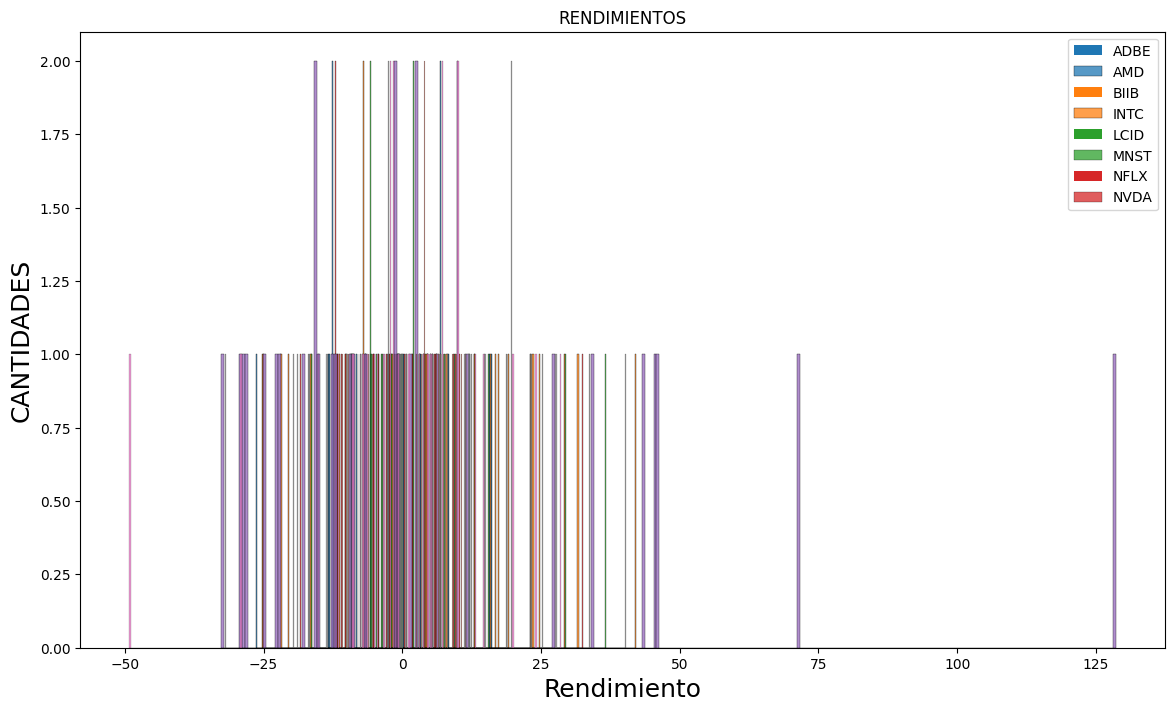

In [463]:
plt.figure(figsize=(14, 8))
for i in rendimiento.columns.values:
    #plt.hist(rendimiento[i]*100, label = i, bins=300)
    sns.histplot(rendimiento[i]*100, label=i, bins=300)
plt.title('RENDIMIENTOS')
plt.xlabel('Rendimiento', fontsize=18)
plt.ylabel('CANTIDADES', fontsize=18)
plt.legend(rendimiento.columns.values, loc='upper left')
plt.legend(rendimiento.columns.values)
#eliminamos los extremos con menos cantidad de datos.
#plt.xlim(-20,20)
plt.show()

### Matriz de covarianzas.
Valor que refleja en cómo varían dos variables de forma conjunta respecto a sus medias.

In [464]:
mCovarianza = rendimiento.cov(ddof=0, numeric_only=False)
cm = sns.light_palette("green", as_cmap=True)
mCovarianza.style.background_gradient(cmap=cm)

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
ADBE,0.011696,0.013239,-0.000063,0.005495,0.006414,0.002123,0.008581,0.013149
AMD,0.013239,0.030720,-0.002186,0.006507,0.014222,0.002842,0.012622,0.025149
BIIB,-0.000063,-0.002186,0.011415,0.000269,0.007675,0.000806,0.003167,0.000521
INTC,0.005495,0.006507,0.000269,0.009894,0.009416,0.001837,0.004486,0.006257
LCID,0.006414,0.014222,0.007675,0.009416,0.116269,-0.006319,0.015360,0.019812
MNST,0.002123,0.002842,0.000806,0.001837,-0.006319,0.003861,0.001414,0.001337
NFLX,0.008581,0.012622,0.003167,0.004486,0.015360,0.001414,0.020292,0.015048
NVDA,0.013149,0.025149,0.000521,0.006257,0.019812,0.001337,0.015048,0.029194


### Carga de pruebas de WEIGHT, Rendimiento y riesgo del portafolio

#### Se definen 3 arrays
- PesosPortafolio = pesos randoms con cantidad de elementos igual al numero de activos.
- rportafolio = Rendimiento del portafolio
- sdPortafolio = desvio standard, o riesgo del portafolio

In [465]:
pesosPortafolio = []
rPortafolio = []
sdPortafolio = []

#guardamos la cantidad de activos que tenemos para el análisis.
nrosActivos = len(rendimiento.columns)
nrosActivos

8

In [466]:
for x in range(10000):
    pesos = np.random.random(len(rendimiento.columns)) # Arreglo de 1 x la cantidad de activos
    # Dividir por la suma total de los números
    pesos /= np.sum(pesos)
    # Agrega cada prueba a la matriz
    pesosPortafolio.append(pesos)

    # Retorno la "sumaProducto" o el producto de la matriz 
    # con los porcentajes de inversion X el rendimiento de cada activo
    rPortafolio.append(np.dot(rendimiento.mean(), pesos)) # rendimiento.mean() = matriz de 7X1

    # np.dot(mCovarianzas, pesos)  retorna matriz 1X7 de multiplicar los
    # pesos(porcentaje a invertir) y la matriz de covarianzas
    # A esa matriz de 1X7 de varianzas, la vuelvo a multiplicar por pesos.T
    # eso nos devuelve un solo resultado, la varianza de la inversion y
    # posteriormente el STD
    sdPortafolio.append(np.sqrt(
        np.dot(pesos.T, np.dot(mCovarianza, pesos))
    ))

#### Ejemplo
Para la primera distribución de la inversión en % en los 7 activos:

In [467]:
for i in range(len(pesosPortafolio[0])):
    print(rendimiento.columns[i],' -> ', round(pesosPortafolio[0][i]*100,2), '%')

ADBE  ->  4.0 %
AMD  ->  16.96 %
BIIB  ->  19.72 %
INTC  ->  14.68 %
LCID  ->  10.29 %
MNST  ->  18.7 %
NFLX  ->  3.2 %
NVDA  ->  12.45 %


Va a tener el siguiente rendimiento:

In [468]:
str(round(rPortafolio[0], 5)*100) + ' %'

'2.001 %'

Tiene el siguiente riesgo (%):

In [469]:
str(round(sdPortafolio[0], 3)*100) + ' %'

'8.7 %'

###Generación de diccionarios 
A partir de estas 3 variables, vamos a buscar minimizar el riesgo y maximizar el retorno
Generamos un diccionario de listas -> lista de rendimiento, riesgo y una lista para cada acción con sus porcentajes de inversión

In [470]:
diccionario = {'Rendimiento': rPortafolio, 'Riesgo': sdPortafolio}
for i, accion in enumerate(rendimiento.columns.tolist()):
    diccionario['USD ' + accion] = [w[i] for w in pesosPortafolio]

Generamos un DataFrame a partir del diccionario para tener las inversiones, riesgo y rendimiento en una sola linea

In [471]:
matrizPortafolio = pd.DataFrame(diccionario)
matrizPortafolio

,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
0,0.020012,0.087213,0.040007,0.169608,0.197232,0.146816,0.102918,0.186971,0.031996,0.124452
1,0.019644,0.115455,0.106215,0.075621,0.080321,0.067598,0.158280,0.069633,0.286166,0.156166
2,0.019354,0.103063,0.265417,0.025078,0.119538,0.076331,0.202739,0.174090,0.011026,0.125781
3,0.017312,0.100513,0.208372,0.009470,0.174403,0.072323,0.200970,0.163713,0.085128,0.085622
4,0.019786,0.089932,0.073029,0.183265,0.127337,0.172692,0.038710,0.163705,0.064117,0.177145
...,...,...,...,...,...,...,...,...,...,...
9995,0.011485,0.097200,0.182685,0.003079,0.216127,0.229742,0.180685,0.065824,0.090248,0.031609
9996,0.012762,0.084279,0.153871,0.111806,0.173662,0.164350,0.080809,0.116847,0.154892,0.043763
9997,0.020485,0.101328,0.056912,0.001579,0.078120,0.203063,0.139331,0.146339,0.131093,0.243562
9998,0.021917,0.111453,0.220810,0.021576,0.089823,0.005454,0.199798,0.158105,0.130112,0.174322


## Frontera Eficiente
A continuación tenemos todas las carteras posibles con sus Riesgos y Rendimientos.

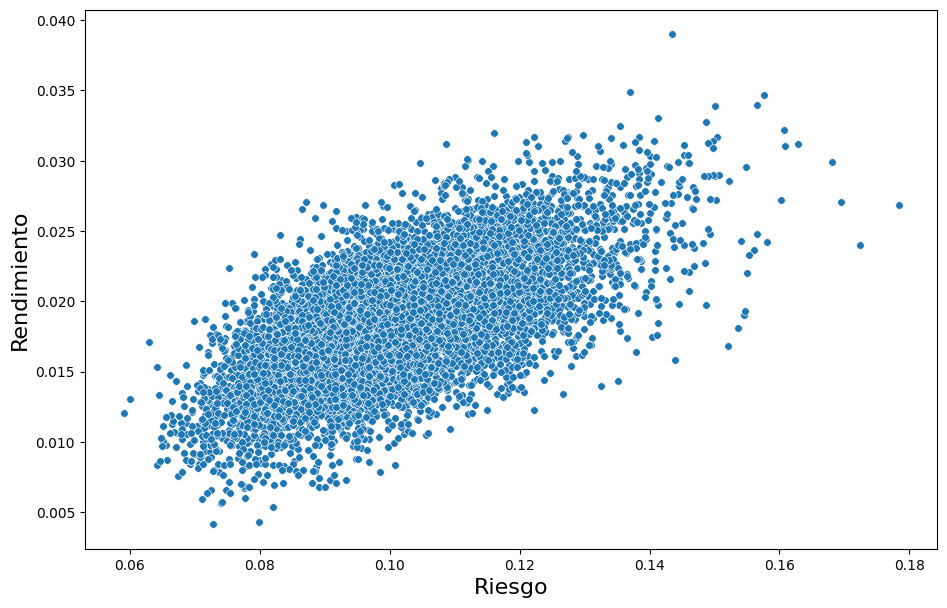

In [472]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

# ANÁLISIS

### Mínima Varianza
Buscamos el menor riesgo. Las carteras eficientes en las cuales deberíamos invertir, debe tener riesgo mayor a la mínima varianza, pero siempre mayor rendimiento.
En el siguiente gráfico están ubicadas por encima de la línea punteada.

In [473]:
minimaVarianza = matrizPortafolio.iloc[matrizPortafolio['Riesgo'].idxmin()]
display(minimaVarianza)
display(minimaVarianza.loc["Rendimiento"]*100)

Rendimiento    0.012037
Riesgo         0.059013
USD ADBE       0.026518
USD AMD        0.020917
USD BIIB       0.099568
USD INTC       0.216406
USD LCID       0.046299
USD MNST       0.475765
USD NFLX       0.071126
USD NVDA       0.043402
Name: 6159, dtype: float64

1.20368995285102

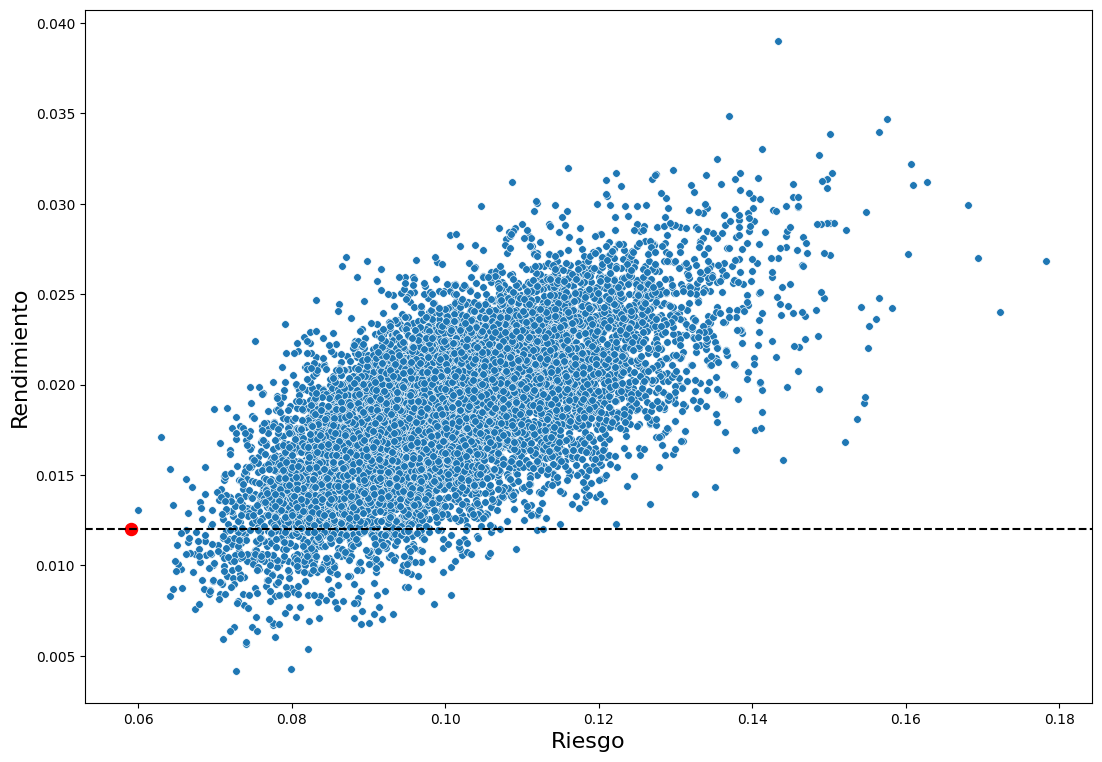

In [474]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

### Mayor rendimiento
Buscamos la inversión con mayor rendimiento de las pruebas. 
A partir de este punto, todos los que se encuetran a la derecha de la línea punteada, serán irrelevantes porque tienene menor rendimiento y mayor riesgo.


In [475]:
mayorRendimiento = matrizPortafolio.loc[matrizPortafolio['Rendimiento'].idxmax()]
mayorRendimiento

Rendimiento    0.038998
Riesgo         0.143421
USD ADBE       0.085870
USD AMD        0.027574
USD BIIB       0.018827
USD INTC       0.013664
USD LCID       0.154223
USD MNST       0.068156
USD NFLX       0.037011
USD NVDA       0.594674
Name: 7139, dtype: float64

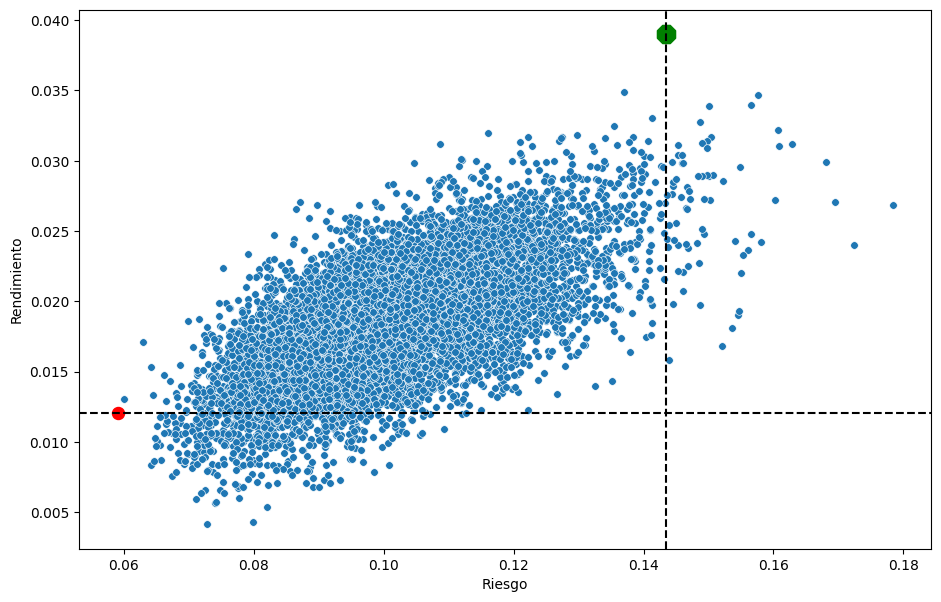

In [476]:
'''matrizPortafolio.plot(x='Riesgo',y='Rendimiento', kind='scatter', figsize=(13,9) )
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='*', s=300)
plt.scatter(x=optimo[1], y=optimo[0], color='green', marker='*', s=300)
plt.savefig('FronteraEficiente', dpi=200)'''


plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Cuadrante óptimo
Selección de los portafolios óptimos cuadrante superior izquierdo

In [477]:
m = matrizPortafolio
m = m[(m["Rendimiento"] >= minimaVarianza[0]) & (m["Riesgo"] <= mayorRendimiento[1])]

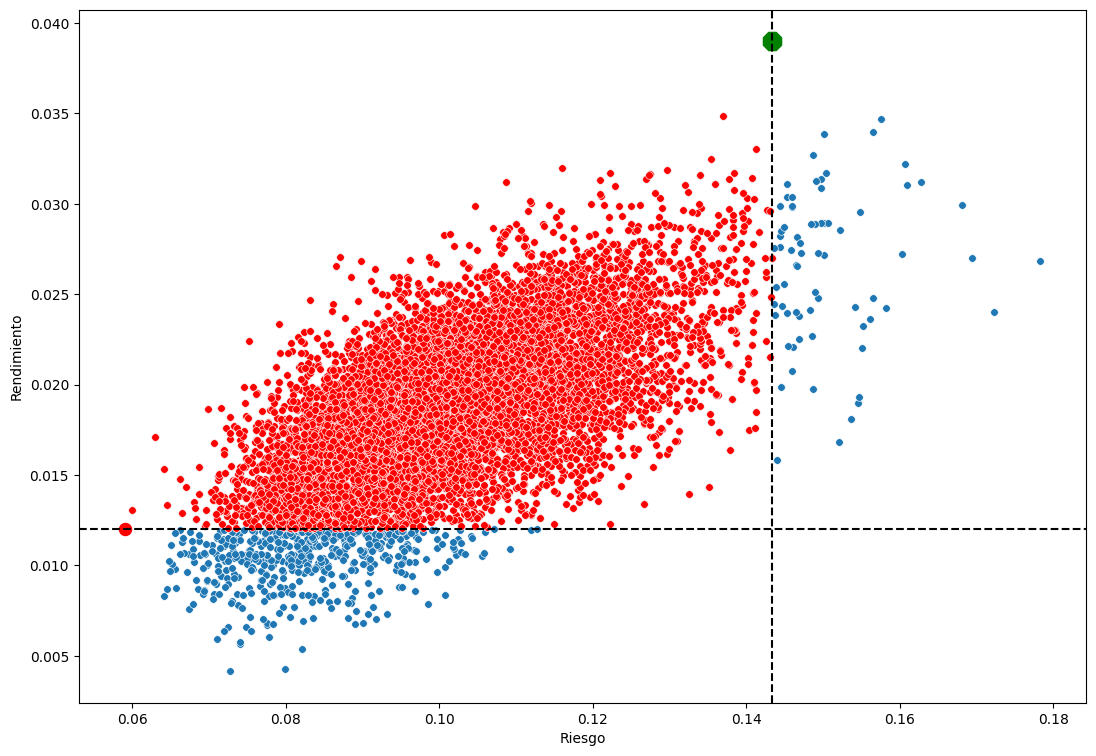

In [478]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=m, x = 'Riesgo', y='Rendimiento', color="red", s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Pendiente óptima

In [479]:
# Encontrar la pendiente de la línea recta que cruza los dos puntos.
x1, y1 = minimaVarianza['Riesgo'], minimaVarianza['Rendimiento']
x2, y2 = mayorRendimiento['Riesgo'], mayorRendimiento['Rendimiento']
pendiente = (y2 - y1) / (x2 - x1)
print("Pendiente: ", pendiente)
b = y1 - pendiente * x1
print("Punto de corte", b)


Pendiente:  0.3194140582250049
Punto de corte -0.006812761457138338


In [480]:
x_vals, y_vals = [], []
for index, row in m.iterrows():
    x = row['Riesgo']
    y = row['Rendimiento']
    if y >= pendiente * x + b:
        x_vals.append(x)
        y_vals.append(y)
pendiente_optima = pd.DataFrame({'Riesgo': x_vals, 'Rendimiento': y_vals})

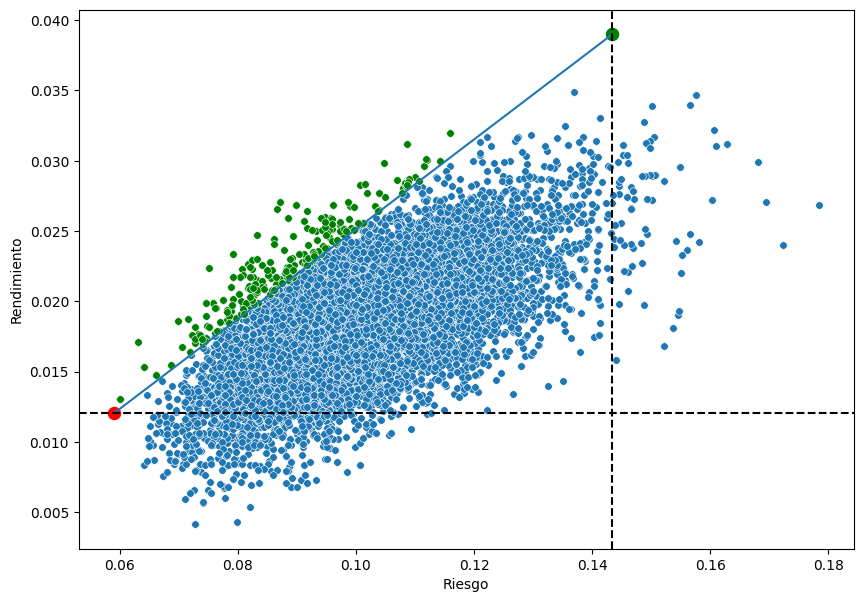

In [481]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=pendiente_optima, x = 'Riesgo', y='Rendimiento', color="green", s=30)


# Puntos de menor riesgo(rojo) y mayor retorno(Verde)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='.', s=300)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)

plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])


plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Definición de carteras según perfil de riesgo del inversor

 Borramos las carteras que no vamos a tomar

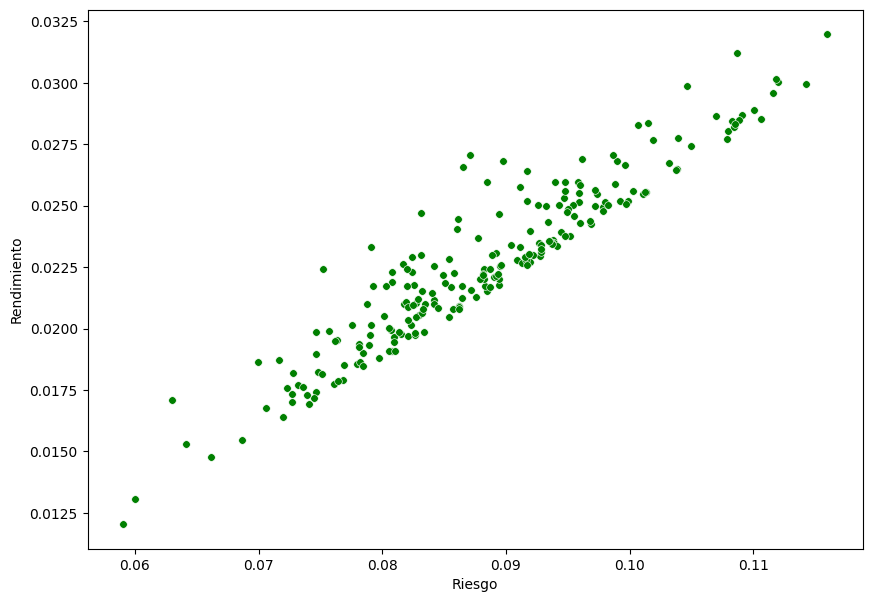

In [482]:
plt.figure(figsize=(10,7))
sns.scatterplot(data= pendiente_optima, x = 'Riesgo', y='Rendimiento',color='green', s=30)

#plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])
#plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
#plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

#### Definir los 3 perfiles
Dividir en 3 sectores del gráfico según perfil del riesgo

In [483]:
division = (pendiente_optima['Riesgo'].max()  - pendiente_optima['Riesgo'].min()) / 3
division
bajo = pendiente_optima['Riesgo'].min() + division
medio = bajo + division

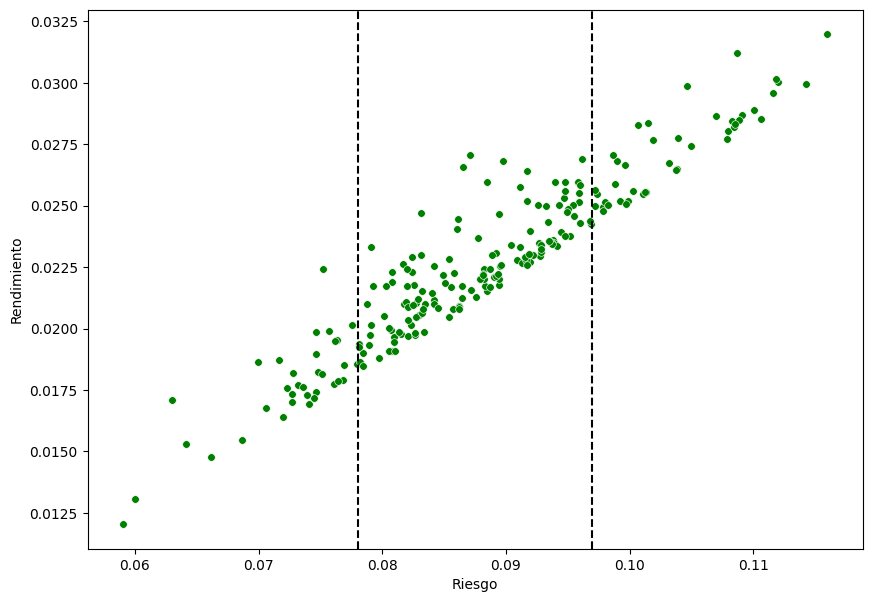

In [484]:
plt.figure(figsize=(10,7))
sns.scatterplot(data= pendiente_optima, x = 'Riesgo', y='Rendimiento',color='green', s=30)

plt.axvline(x=bajo, color='black', linestyle='--')
plt.axvline(x=medio, color='black', linestyle='--')
plt.show()

# REVISAR DESDE ACÁ
## TAMBIÉN ARRIBA COMO REPRESENTAR LOS VALORES EN %  (*100)

### Portafolio optimo
Para cada Riesgo que estamos dispuestos a correr, tomamos el valor máximo de rendimiento

In [485]:
porfolioOptimo = matrizPortafolio.loc[matrizPortafolio.groupby('Riesgo')['Rendimiento'].idxmax()].reset_index(drop=True)
porfolioOptimo.head()

,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
0,0.012037,0.059013,0.026518,0.020917,0.099568,0.216406,0.046299,0.475765,0.071126,0.043402
1,0.013045,0.060039,0.043629,0.044610,0.365421,0.055288,0.013460,0.372159,0.078670,0.026763
2,0.017083,0.063012,0.018463,0.115664,0.282348,0.104732,0.035305,0.362521,0.000780,0.080188
3,0.015319,0.064096,0.049575,0.007370,0.343747,0.055451,0.037581,0.325070,0.087868,0.093339
4,0.008326,0.064138,0.124465,0.005742,0.182836,0.295071,0.044342,0.259148,0.055814,0.032582


# Pruebas 

###Segmentar en 3 bloques de riesgos:
    - bajo
    - medio
    - alto


In [486]:
# Crea nuevo DataFrame para almacenar los valores seleccionados
portafolioReducido = pd.DataFrame(columns=matrizPortafolio.columns)
# n es el rango que toma para tomar el máximo rendimiento
n = 30
for i in range(0, len(matrizPortafolio), n):
    # Toma las n filas correspondientes
    df_temp = matrizPortafolio.iloc[i:i+n]
    # selecciona el máximo rendimiento de esas n filas
    df_max = df_temp.loc[df_temp["Rendimiento"].idxmax()]
    # Agrega el registro en un nuevo dataframe
    portafolioReducido = portafolioReducido.append(df_max, ignore_index=True)



    

<ipython-input-486-7d57fb754a29>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  portafolioReducido = portafolioReducido.append(df_max, ignore_index=True)


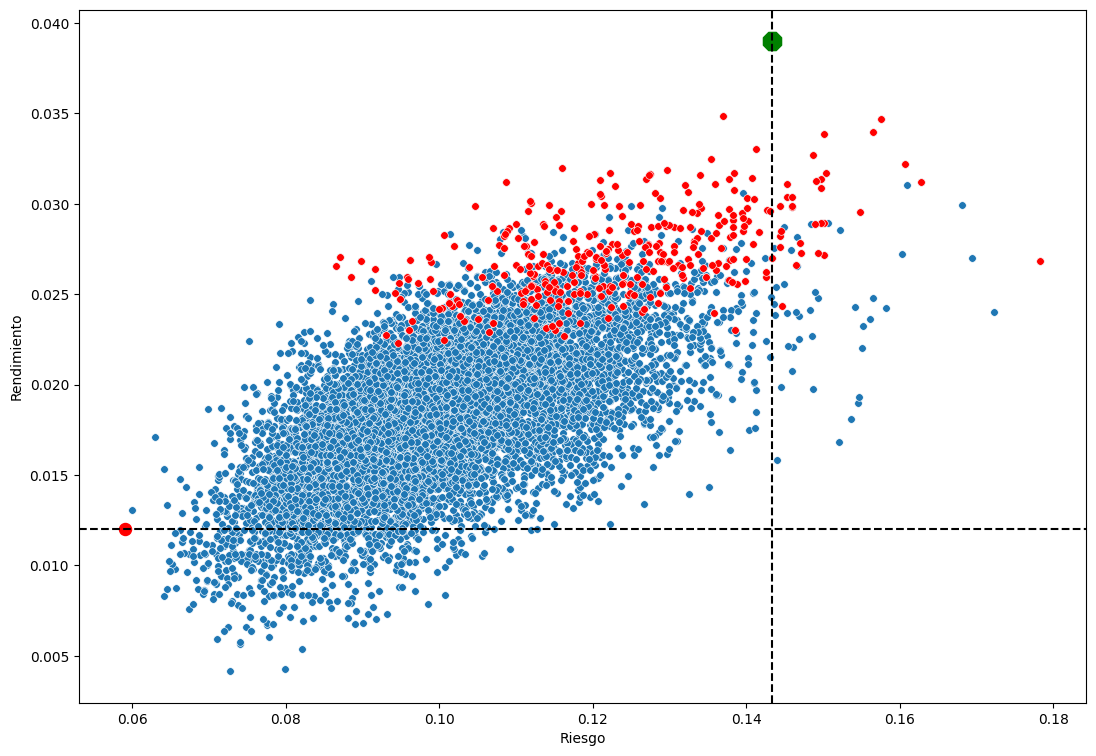

In [487]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=portafolioReducido, x = 'Riesgo', y='Rendimiento', color="red", s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Extraigo la pendiente de la recta que corta los puntos de mínimo riesgo y máximo retorno
b = y1 - m * x1

In [488]:
matrizPortafolio

,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
0,0.020012,0.087213,0.040007,0.169608,0.197232,0.146816,0.102918,0.186971,0.031996,0.124452
1,0.019644,0.115455,0.106215,0.075621,0.080321,0.067598,0.158280,0.069633,0.286166,0.156166
2,0.019354,0.103063,0.265417,0.025078,0.119538,0.076331,0.202739,0.174090,0.011026,0.125781
3,0.017312,0.100513,0.208372,0.009470,0.174403,0.072323,0.200970,0.163713,0.085128,0.085622
4,0.019786,0.089932,0.073029,0.183265,0.127337,0.172692,0.038710,0.163705,0.064117,0.177145
...,...,...,...,...,...,...,...,...,...,...
9995,0.011485,0.097200,0.182685,0.003079,0.216127,0.229742,0.180685,0.065824,0.090248,0.031609
9996,0.012762,0.084279,0.153871,0.111806,0.173662,0.164350,0.080809,0.116847,0.154892,0.043763
9997,0.020485,0.101328,0.056912,0.001579,0.078120,0.203063,0.139331,0.146339,0.131093,0.243562
9998,0.021917,0.111453,0.220810,0.021576,0.089823,0.005454,0.199798,0.158105,0.130112,0.174322


In [489]:
matrizPortafolio[matrizPortafolio['Rendimiento'].between(0.017, 0.0178)]

,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
3,0.017312,0.100513,0.208372,0.009470,0.174403,0.072323,0.200970,0.163713,0.085128,0.085622
7,0.017081,0.120611,0.010177,0.057513,0.054420,0.095096,0.249704,0.190009,0.314084,0.028997
17,0.017083,0.099659,0.306330,0.282275,0.083678,0.090178,0.061969,0.107529,0.017684,0.050358
22,0.017696,0.111343,0.184809,0.300271,0.041958,0.062924,0.075054,0.066759,0.219121,0.049104
32,0.017715,0.089042,0.055162,0.005754,0.160803,0.248473,0.087640,0.115372,0.101757,0.225040
...,...,...,...,...,...,...,...,...,...,...
9872,0.017333,0.093290,0.210863,0.088278,0.020477,0.230331,0.054015,0.157776,0.038028,0.200232
9915,0.017116,0.127890,0.159292,0.097449,0.045012,0.146014,0.251137,0.044750,0.201926,0.054421
9946,0.017225,0.107581,0.131150,0.158590,0.140906,0.203263,0.181533,0.054046,0.062050,0.068463
9963,0.017103,0.100876,0.149416,0.209097,0.154995,0.052747,0.071260,0.054901,0.230612,0.076972
